# Monte Carlo simulations for TEP2485

### imports 

In [1]:
import scipy.stats as sts #distributions
import numpy as np 
import matplotlib.pyplot as plt #plotting
import random #for bootstrapping

from tqdm.notebook import tqdm #progress bar


#### MC for pi
###### Image to visualize the concept

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

### pick distributions and generate samples

In [2]:
#sample some points in first quadrant from 0-1 for both x and y
n_samples = 1000
X = sts.uniform.rvs(0,1, n_samples)
Y = sts.uniform.rvs(0,1, n_samples)

### check for all points if they are withing the circle 

In [3]:
counter = 0
xy_status = []
x_in = []
y_in = []
x_out = []
y_out = []
for x, y in tqdm(zip(X, Y)):
    if x**2 + y**2 <1:
        counter +=1
        xy_status.append(1)
        x_in.append(x)
        y_in.append(y)
    else:
        xy_status.append(0)
        x_out.append(x)
        y_out.append(y)

0it [00:00, ?it/s]

### visualize the results point by point

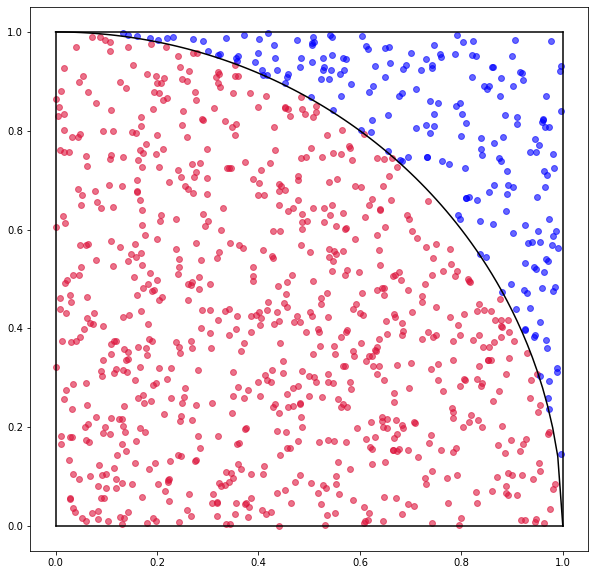

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(x_in, y_in, s = 35,c = 'crimson', alpha = 0.6)
plt.scatter(x_out, y_out, s = 35, c = 'blue', alpha = 0.6)
plt.plot([0,1],[0,0], c = 'k')
plt.plot([0,1], [1,1], c='k')
plt.plot([0,0], [0,1], c= 'k')
plt.plot([1,1], [0,1], c = 'k')
X = np.linspace(0,1, 101)
Y = [(1-x**2)**0.5 for x in X]
plt.plot(X,Y, c = 'k')

### get estimate of pi

In [5]:
print(f'out of a total of {n_samples} points {counter} were in the cirle. => Pi estimate is {counter/n_samples*4} (true pi is {np.pi}).')


out of a total of 1000 points 790 were in the cirle. => Pi estimate is 3.16 (true pi is 3.141592653589793).


### use bootstrapping for confidence intervals on the results

  0%|          | 0/500 [00:00<?, ?it/s]

This MC suggests that pi is 3.15584 plusminus 0.46817202992062645 (99% conf interval: 2.6876679700793735 - 3.6240120299206264).


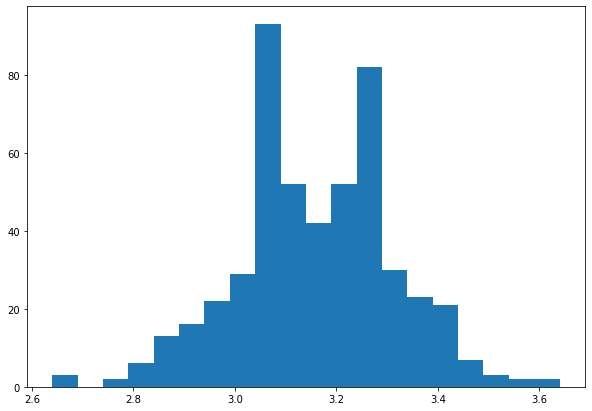

In [6]:
pi_estimates = []
BS_size = int(n_samples/10)
n_BS = 500
for _ in tqdm(range(n_BS)):
    this_list = random.sample(xy_status,BS_size)
    hits = sum(this_list)
    pi_estimates.append(hits/BS_size*4)

plt.figure(figsize=(10,7))
plt.hist(pi_estimates, bins = 'auto')
pi_mean = np.mean(pi_estimates)
pi_std = np.std(pi_estimates)
print(f'This MC suggests that pi is {pi_mean} plusminus {3*pi_std} (99% conf interval: {pi_mean - 3*pi_std} - {pi_mean + 3*pi_std}).')


###### all in one:

# generate example system and do MC for mass balanced flow

#### generate one in and one outflow:

In [7]:
n = 100000
A01 = sts.norm.rvs(100,10,n)
A10a = sts.truncnorm.rvs(a = (0-60)/20,b= 1000,loc=60, scale=5,size=n)

### plot distributions:

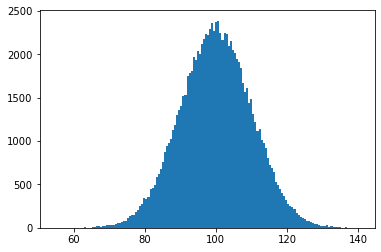

In [8]:
n, bins, patches = plt.hist(A01, bins = 'auto')

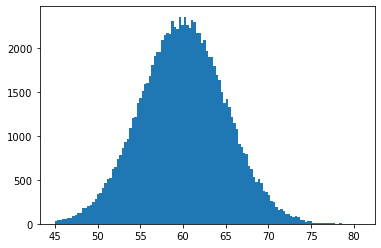

In [9]:
n, bins, patches = plt.hist(A10a, bins = 'auto')

#### MC for the resulting flow and plot

0it [00:00, ?it/s]

A01 is 94.0, A10a is 61.0 and therefore A10b is 33.0.
A01 is 110.0, A10a is 61.0 and therefore A10b is 49.0.
A01 is 90.0, A10a is 57.0 and therefore A10b is 33.0.
A01 is 74.0, A10a is 66.0 and therefore A10b is 8.0.
A01 is 86.0, A10a is 60.0 and therefore A10b is 26.0.
A01 is 95.0, A10a is 52.0 and therefore A10b is 43.0.
A01 is 97.0, A10a is 58.0 and therefore A10b is 39.0.
A01 is 107.0, A10a is 53.0 and therefore A10b is 54.0.
A01 is 89.0, A10a is 60.0 and therefore A10b is 29.0.
A01 is 101.0, A10a is 51.0 and therefore A10b is 50.0.
A01 is 112.0, A10a is 57.0 and therefore A10b is 55.0.
A01 is 113.0, A10a is 61.0 and therefore A10b is 52.0.
A01 is 95.0, A10a is 49.0 and therefore A10b is 46.0.
A01 is 106.0, A10a is 60.0 and therefore A10b is 46.0.
A01 is 104.0, A10a is 49.0 and therefore A10b is 55.0.
A01 is 97.0, A10a is 63.0 and therefore A10b is 34.0.
A01 is 107.0, A10a is 55.0 and therefore A10b is 52.0.
A01 is 88.0, A10a is 61.0 and therefore A10b is 27.0.
A01 is 118.0, A10a is

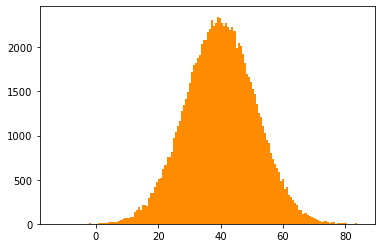

In [10]:


A10b = []

for i, (a01, a10a) in tqdm(enumerate(zip(A01,A10a))):
    if i<20:
        print(f'A01 is {np.round(a01)}, A10a is {np.round(a10a)} and therefore A10b is {np.round(a01)-np.round(a10a)}.')
    A10b.append(a01-a10a)

plt.figure()
n, bins, patches = plt.hist(A10b, color = 'darkorange', bins = 'auto')


#### plot first seven entries of result vector (for animations on slide)

(0.0, 90.0)

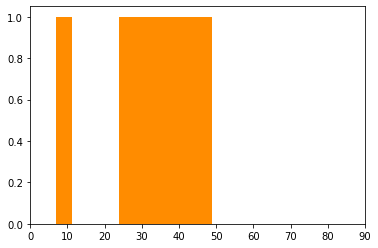

In [11]:
n, bins, patches = plt.hist(np.round(A10b[0:7]), color = 'darkorange')
plt.xlim(0,90)

##### plot resulting histogram with mean and std

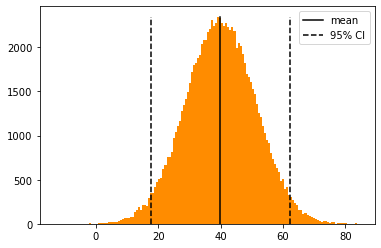

In [12]:
mean = np.mean(A10b)
std = np.std(A10b)

n, bins, patches = plt.hist(A10b, color = 'darkorange', bins = 'auto')
Y = [0, max(n)]
plt.plot([mean, mean], Y, c = 'k', label = 'mean')
plt.plot([mean-2*std, mean-2*std], Y,'--', c = 'k', label = '95% CI')
plt.plot([mean+2*std, mean+2*std], Y,'--', c = 'k')
plt.legend()

In [13]:
n

array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
       2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
       3.000e+00, 2.000e+00, 2.000e+00, 7.000e+00, 4.000e+00, 1.200e+01,
       1.400e+01, 1.100e+01, 1.800e+01, 1.700e+01, 2.500e+01, 2.600e+01,
       1.900e+01, 3.100e+01, 3.800e+01, 5.300e+01, 6.800e+01, 6.700e+01,
       6.100e+01, 7.800e+01, 7.900e+01, 1.310e+02, 1.530e+02, 1.860e+02,
       1.540e+02, 2.110e+02, 2.150e+02, 2.070e+02, 2.900e+02, 3.480e+02,
       3.500e+02, 4.220e+02, 4.700e+02, 5.040e+02, 5.140e+02, 6.160e+02,
       6.630e+02, 7.570e+02, 7.600e+02, 8.190e+02, 9.710e+02, 1.036e+03,
       1.110e+03, 1.166e+03, 1.281e+03, 1.344e+03, 1.411e+03, 1.488e+03,
       1.590e+03, 1.720e+03, 1.796e+03, 1.818e+03, 1.880e+03, 1.915e+03,
       2.037e+03, 2.085e+03, 2.087e+03, 2.170e+03, 2.212e+03, 2.310e+03,
       2.245e+03, 2.272e+03, 2.346e+03, 2.326e+03, 

## Distribution examples
just plotting the pdf of some distributions


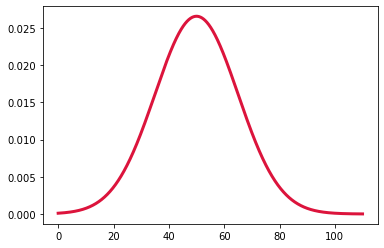

In [14]:
x = np.linspace(0,110, 10001)
plt.plot(x,sts.norm.pdf(x,loc = 50, scale=15), color = 'crimson', lw = 3)

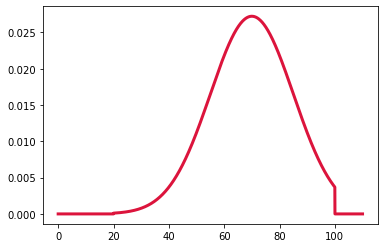

In [15]:
plt.plot(x,sts.truncnorm.pdf(x,a = (0-50)/15,b= (100-70)/15,loc=70, scale=15), color = 'crimson', lw = 3)

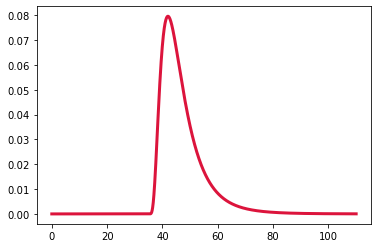

In [16]:
plt.plot(x,sts.lognorm.pdf(x, 0.6, loc=35, scale=10), color = 'crimson', lw = 3)

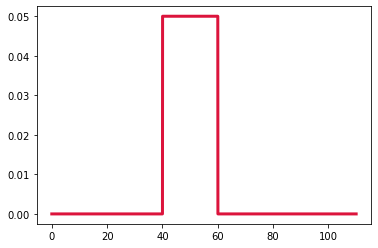

In [17]:
plt.plot(x,sts.uniform.pdf(x, 40, 20), color = 'crimson', lw = 3)

### sampling example (scatter plot)

#### 2D

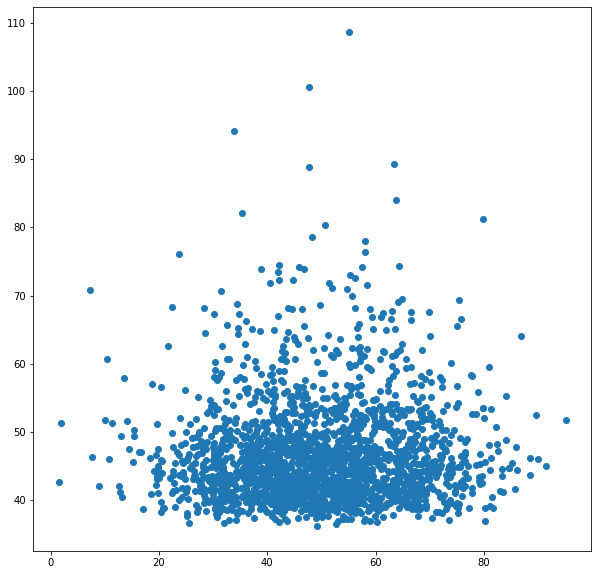

In [18]:
#plt.scatter(sts.lognorm.rvs( 0.6, loc=35, scale=10, size = 2000),sts.norm.rvs(loc = 50, scale=15, size = 2000), s = 15, color = 'tomato', alpha = 0.8)
X = sts.norm.rvs(loc = 50, scale=15, size = 2000)
Y = sts.lognorm.rvs( 0.6, loc=35, scale=10, size = 2000)
plt.figure(figsize=(10,10))
plt.scatter(X, Y)

##### 3D version

Text(0.5, 0, 'Z - lognormal distribution (start 35, mode 42)')

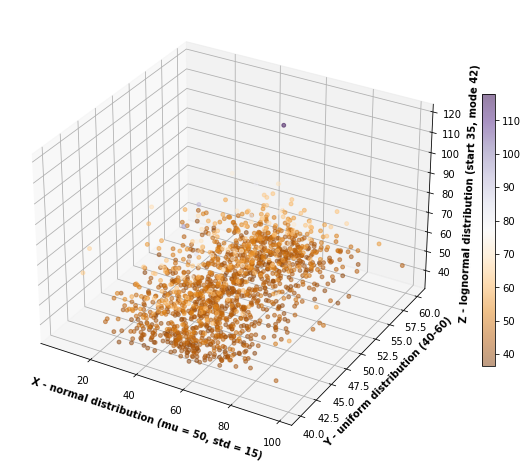

In [19]:
n_points = 1500
X = sts.norm.rvs(loc = 50, scale=15, size = n_points)
Z = sts.lognorm.rvs( 0.6, loc=35, scale=10, size = n_points)
Y = sts.uniform.rvs(40, 20, size = n_points)
plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
scatter_plot = ax.scatter3D(X,Y,Z, c = Z, cmap = plt.get_cmap('PuOr'), s = 15, alpha = 0.5)
plt.colorbar(scatter_plot, shrink = 0.5)
ax.set_xlabel('X - normal distribution (mu = 50, std = 15)', fontweight ='bold')
ax.set_ylabel('Y - uniform distribution (40-60)', fontweight ='bold')
ax.set_zlabel('Z - lognormal distribution (start 35, mode 42)', fontweight = 'bold')


### Beer bottle example

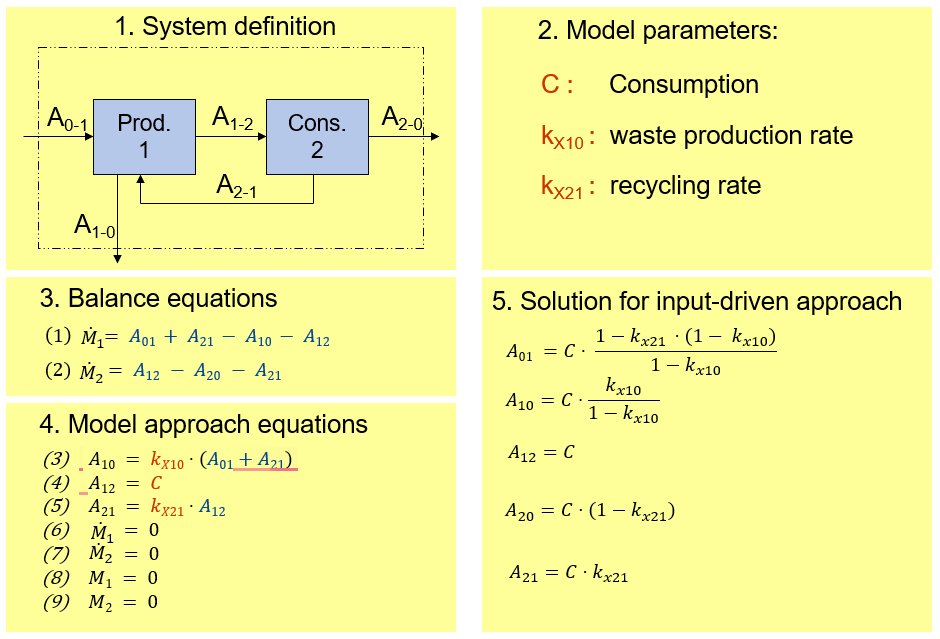

In [20]:
def beer_bottles(parameters: list):
    [C, kx10, kx21] = parameters
    A01 = C*(1-kx21*(1-kx10))/(1-kx10)
    A10 = C*(kx10/(1-kx10))
    A12 = C
    A20 = C*(1-kx21)
    A21 = C* kx21

    return [A01, A10, A12, A20, A21]

input = [20, 0.2, 0.2]
print(f'results of mathematical model {beer_bottles(input)}.')

results of mathematical model [21.0, 5.0, 20, 16.0, 4.0].


##### sampling of values for C

In [21]:
for i in range(8):
    print(np.round(sts.norm.rvs(20,1,1)))

[21.]
[21.]
[20.]
[20.]
[21.]
[20.]
[21.]
[19.]


### Sampling from the chosen distributions

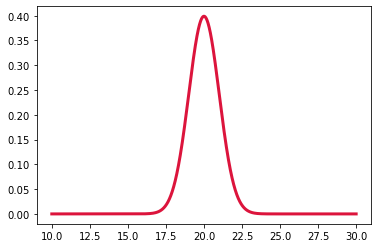

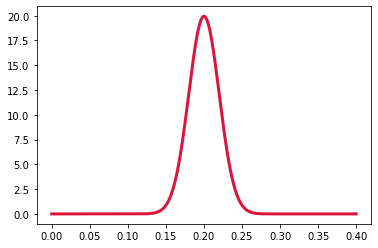

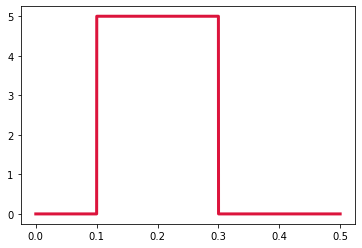

In [22]:
x = np.linspace(10,30, 10001)
plt.plot(x,sts.norm.pdf(x, 20, 1), color = 'crimson', lw = 3)
plt.show()
x = np.linspace(0,0.4, 10001)
plt.plot(x,sts.norm.pdf(x, 0.2, 0.020), color = 'crimson', lw = 3)
plt.show()
x = np.linspace(0,0.5, 10001)
plt.plot(x,sts.uniform.pdf(x, 0.1, 0.2), color = 'crimson', lw = 3)
plt.show()

In [23]:
n_points = 1500
C = sts.norm.rvs(loc = 20, scale=1, size = n_points)
k_x10 = sts.norm.rvs(loc = 0.2, scale=0.02, size = n_points)
k_x21 = sts.uniform.rvs(0.1,0.2, size = n_points)



Text(0.5, 0, 'k_x21 - recycling rate')

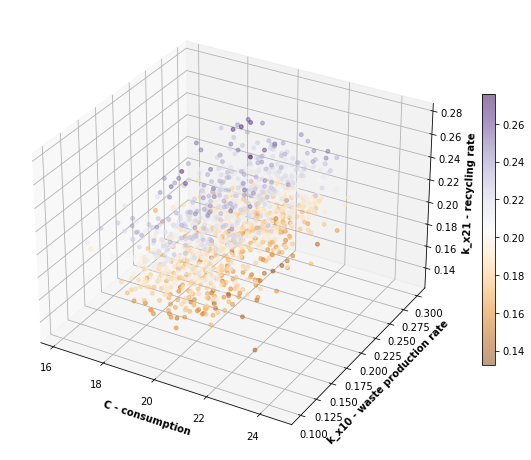

In [24]:
n_points = 1500
X = C
Z = k_x10
Y = k_x21
plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
scatter_plot = ax.scatter3D(X,Y,Z, c = Z, cmap = plt.get_cmap('PuOr'), s = 15, alpha = 0.5)
plt.colorbar(scatter_plot, shrink = 0.5)
ax.set_xlabel('C - consumption', fontweight ='bold')
ax.set_ylabel('k_x10 - waste production rate', fontweight ='bold')
ax.set_zlabel('k_x21 - recycling rate', fontweight = 'bold')

#### creating results

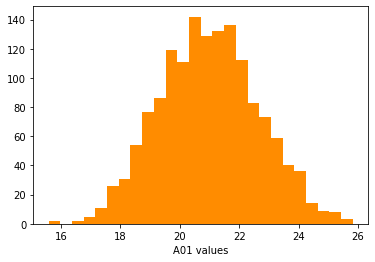

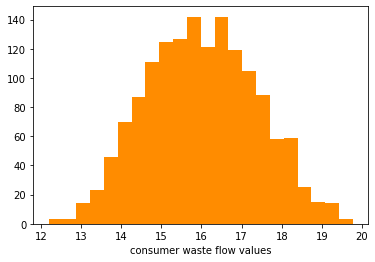

In [37]:
A01 = []
A20 = []

for paras in zip(C, k_x10, k_x21):
    results = beer_bottles(list(paras))
    A01.append(results[0])
    A20.append(results[3])

plt.figure()
n, bins, patches = plt.hist(A01, color = 'darkorange', bins = 'auto')
plt.xlabel('A01 values')
plt.show()

plt.figure()
n, bins, patches = plt.hist(A20, color = 'darkorange', bins = 'auto')
plt.xlabel('consumer waste flow values')
plt.show()

# Data Reconciliation

In [26]:
life = np.linspace(15,60, 1000)

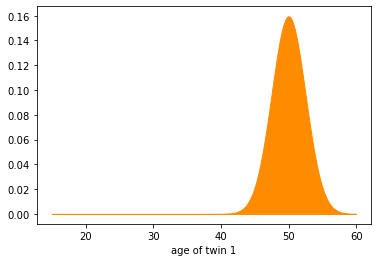

In [27]:
twin1 = sts.norm.pdf(life, loc = 50, scale = 2.5)
plt.figure()
plt.fill_between(life, twin1, [0 for i in range(1000)], color = 'darkorange')
#n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 'auto')
plt.xlabel('age of twin 1')
plt.show()

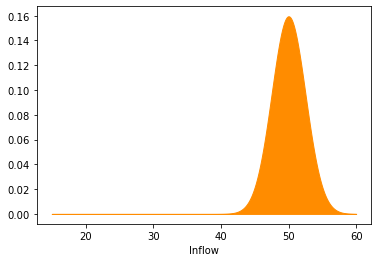

In [28]:
inflow = sts.norm.pdf(life, loc = 50, scale = 2.5)
plt.figure()
plt.fill_between(life, inflow, [0 for i in range(1000)], color = 'darkorange')
#n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 'auto')
plt.xlabel('Inflow')
plt.show()

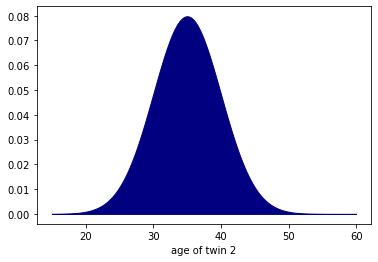

In [29]:
twin2 = sts.norm.pdf(life, loc = 35, scale = 5)
plt.figure()
plt.fill_between(life, twin2, [0 for i in range(1000)], color = 'navy')
plt.xlabel('age of twin 2')
plt.show()

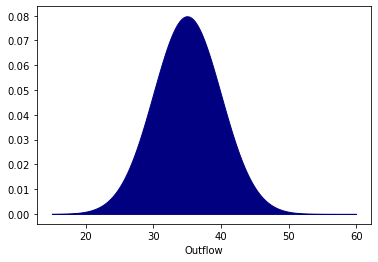

In [30]:
outflow = sts.norm.pdf(life, loc = 35, scale = 5)
plt.figure()
plt.fill_between(life, outflow, [0 for i in range(1000)], color = 'navy')
plt.xlabel('Outflow')
plt.show()

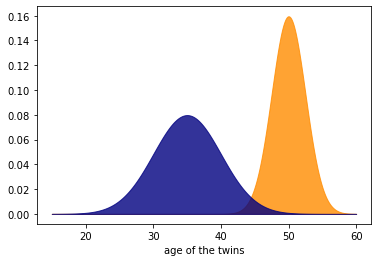

In [31]:
plt.figure()
plt.fill_between(life, twin1, [0 for i in range(1000)], color = 'darkorange', alpha = 0.8)
plt.fill_between(life, twin2, [0 for i in range(1000)], color = 'navy',alpha = 0.8)
plt.xlabel('age of the twins')
plt.show()

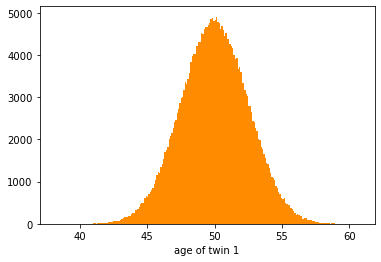

In [32]:
twin1 = sts.norm.rvs(loc = 50, scale = 2.5, size = 300000)
plt.figure()
n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 'auto')
plt.xlabel('age of twin 1')
plt.show()

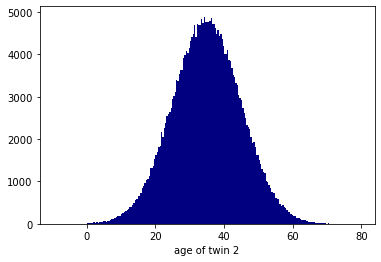

In [33]:
twin2 = sts.norm.rvs(loc = 35, scale = 10, size = 300000)
plt.figure()
n, bins, patches = plt.hist(twin2, color = 'navy', bins = 'auto')
plt.xlabel('age of twin 2')
plt.show()

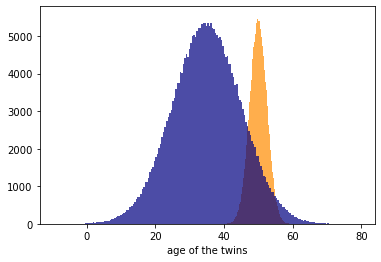

In [34]:
plt.figure()
n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 200, alpha = 0.7,)
n, bins, patches = plt.hist(twin2, color = 'navy', bins = 200, alpha = 0.7)
plt.xlabel('age of the twins')
plt.show()

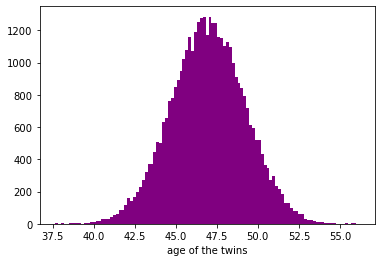

In [35]:
samplesize = 50*10**5
twin1 = sts.norm.rvs(loc = 50, scale = 2.5, size = samplesize)
twin2 = sts.norm.rvs(loc = 35, scale = 5, size = samplesize)

reconciled = []
for t1, t2 in zip(twin1, twin2):
    if abs(t1-t2) < 1:
        reconciled.append(t1)
        reconciled.append(t2)

plt.figure()
n, bins, patches = plt.hist(reconciled, color = 'purple', bins = 'auto',)
plt.xlabel('age of the twins')
plt.show()


In [36]:
print(f' the new mean value is {np.mean(reconciled)} with a standard deviation of {np.std(reconciled)}.')

 the new mean value is 46.96530570370647 with a standard deviation of 2.256534704219814.
